In [1]:
#Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
data = pd.read_csv('C:\\Users\\AHMED\\Documents\\Shai AI internship\\xeek_train_subset.csv')

# Exploration Data Aanlysis :-
> # Check data :-

In [88]:
data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528000,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680000,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832000,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984000,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136000,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133193,16/2-16,2207.310396,476770.12500,6523587.5,-2180.926514,ROTLIEGENDES GP.,Skagerrak Fm.,8.698007,NaN,5.382444,...,22.291321,NaN,NaN,0.107520,NaN,NaN,NaN,NaN,30000,2.0
133194,16/2-16,2207.462396,476770.15625,6523587.5,-2181.078613,ROTLIEGENDES GP.,Skagerrak Fm.,8.721210,NaN,5.651109,...,22.230320,NaN,NaN,0.101821,NaN,NaN,NaN,NaN,30000,2.0
133195,16/2-16,2207.614396,476770.15625,6523587.5,-2181.230469,ROTLIEGENDES GP.,Skagerrak Fm.,8.739136,NaN,5.870602,...,22.388054,NaN,NaN,0.097832,NaN,NaN,NaN,NaN,30000,2.0
133196,16/2-16,2207.766396,476770.15625,6523587.5,-2181.382324,ROTLIEGENDES GP.,Skagerrak Fm.,8.749738,NaN,5.756996,...,23.331690,NaN,NaN,0.092334,NaN,NaN,NaN,NaN,30000,2.0


In [89]:
lithology_numbers = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}
data['LITH'] = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_numbers)


In [90]:
data.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,LITH
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0,Shale
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0,Shale
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0,Shale
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0,Shale
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0,Shale


In [91]:
#check shape and size of data 
print(f"Number of rows in data = {data.shape[0]} column and Number of columns in data = {data.shape[1]} row")
##########
print(f"Size of  data = {data.size}")

Number of rows in data = 133198 column and Number of columns in data = 30 row
Size of  data = 3995940


In [92]:
#check name of columns 
data.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE', 'LITH'],
      dtype='object')

# The data is presented as is and includes a large amount of missing values. Missing data within well logging can arise for a number of reasons including:

## 1.Tool failures & problems
## 2.Missing by choice (i.e. tools not run due to budgetary constraints)
## 3.Human error
## 4.Vintage datasets
## 5.Issues arising from the borehole environment

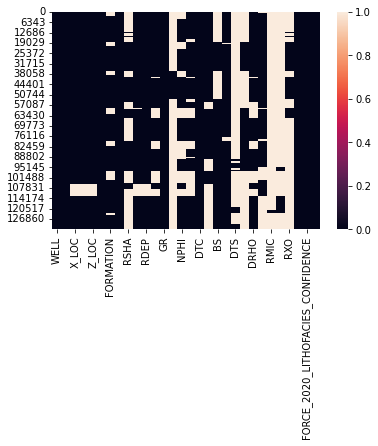

In [8]:
#check location of null value in dataset by seaborn
sns.heatmap(data.isnull())
plt.show()

<AxesSubplot:>

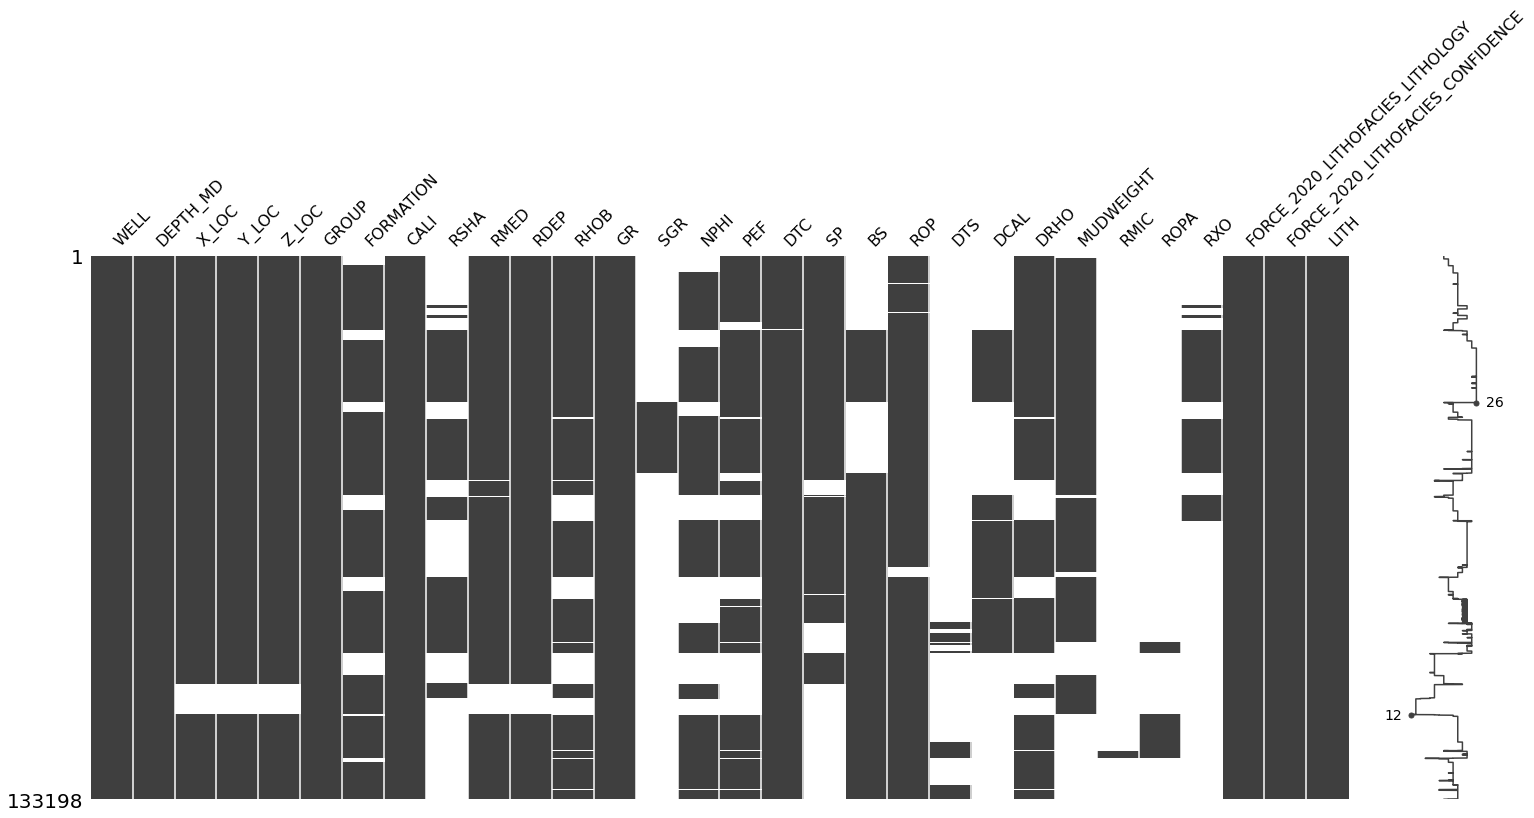

In [9]:
#check location of null value in dataset by missingno
import missingno as msno
msno.matrix(data)

# From the visualisation we can can see that only a handful of columns are complete WELL, DEPTH_MD, GR, GROUP, LITHOFACIES_LITHOLOGY and LITHOFACIES_CONFIDENCE.

# Others have near full data values such DTC, CALI, and ROP, whereas some have very poor data coverage such as RMIC, SGR and ROPA.

<AxesSubplot:>

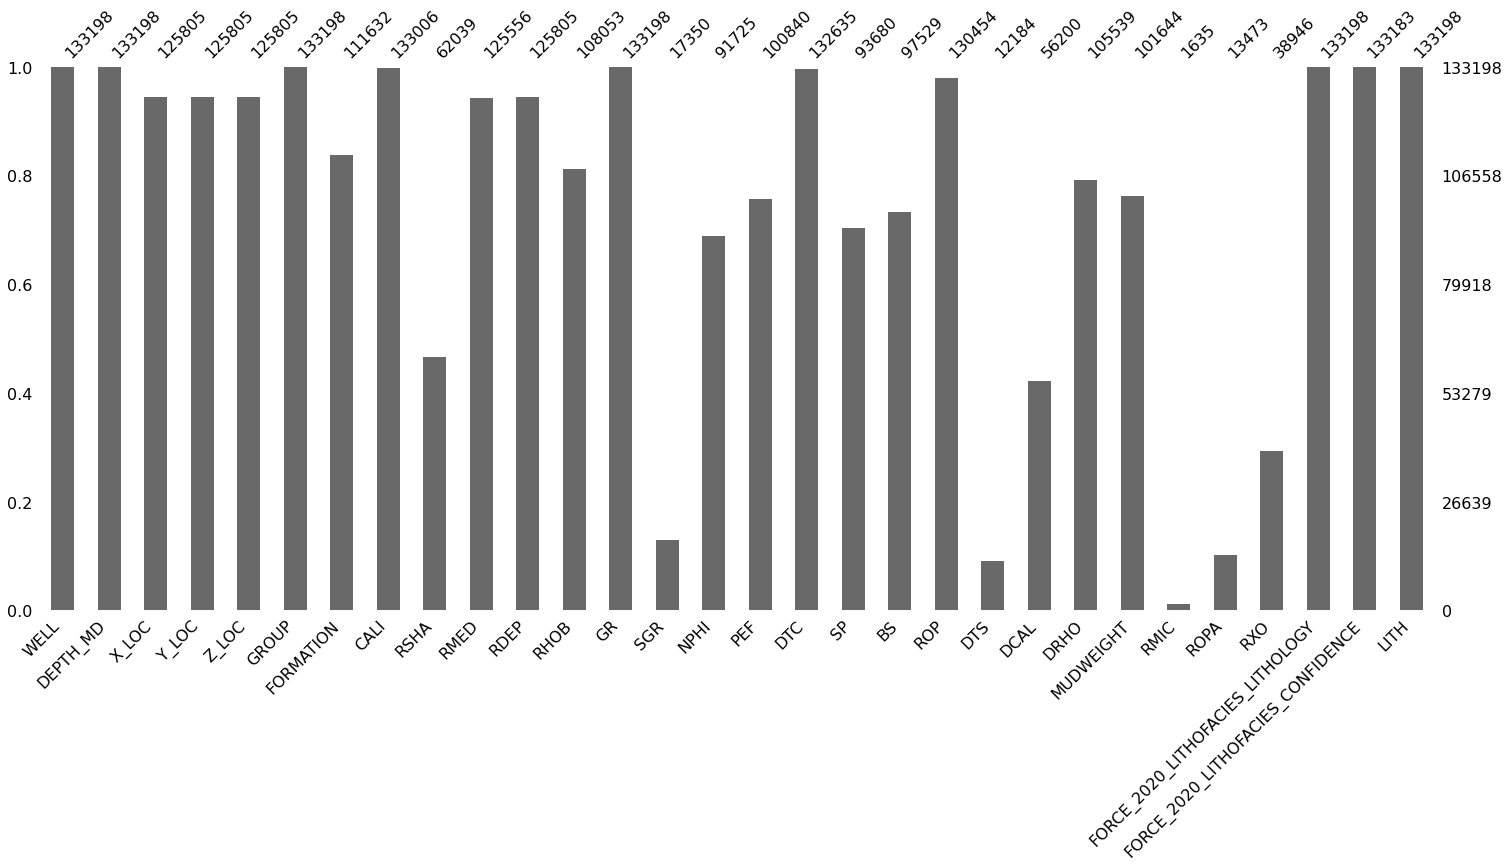

In [10]:
# use msno.bar() to to generate a bar chart showing the amount of non-null data values within each column (log curve)
msno.bar(data)

# selected common curves that a petrophysicist may use in an interpretation.

In [11]:
well_data = data[['WELL','DEPTH_MD','LITH','CALI', 'SP', 'GR','RSHA','RMED','RDEP','RHOB', 'NPHI', 'DTC','MUDWEIGHT']].copy()
well_data

,WELL,DEPTH_MD,LITH,CALI,SP,GR,RSHA,RMED,RDEP,RHOB,NPHI,DTC,MUDWEIGHT
0,15/9-13,494.528000,Shale,19.480835,24.612379,80.200851,NaN,1.611410,1.798681,1.884186,NaN,161.131180,NaN
1,15/9-13,494.680000,Shale,19.468800,23.895531,79.262886,NaN,1.618070,1.795641,1.889794,NaN,160.603470,NaN
2,15/9-13,494.832000,Shale,19.468800,23.916357,74.821999,NaN,1.626459,1.800733,1.896523,NaN,160.173615,NaN
3,15/9-13,494.984000,Shale,19.459282,23.793688,72.878922,NaN,1.621594,1.801517,1.891913,NaN,160.149429,NaN
4,15/9-13,495.136000,Shale,19.453100,24.104078,71.729141,NaN,1.602679,1.795299,1.880034,NaN,160.128342,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133193,16/2-16,2207.310396,Sandstone,8.698007,NaN,127.456139,NaN,5.382444,5.339929,2.531374,NaN,NaN,NaN
133194,16/2-16,2207.462396,Sandstone,8.721210,NaN,128.403305,NaN,5.651109,5.689734,2.526128,NaN,NaN,NaN
133195,16/2-16,2207.614396,Sandstone,8.739136,NaN,127.829262,NaN,5.870602,5.496074,2.528934,NaN,NaN,NaN
133196,16/2-16,2207.766396,Sandstone,8.749738,NaN,126.552277,NaN,5.756996,5.345353,2.527052,NaN,NaN,NaN


<AxesSubplot:>

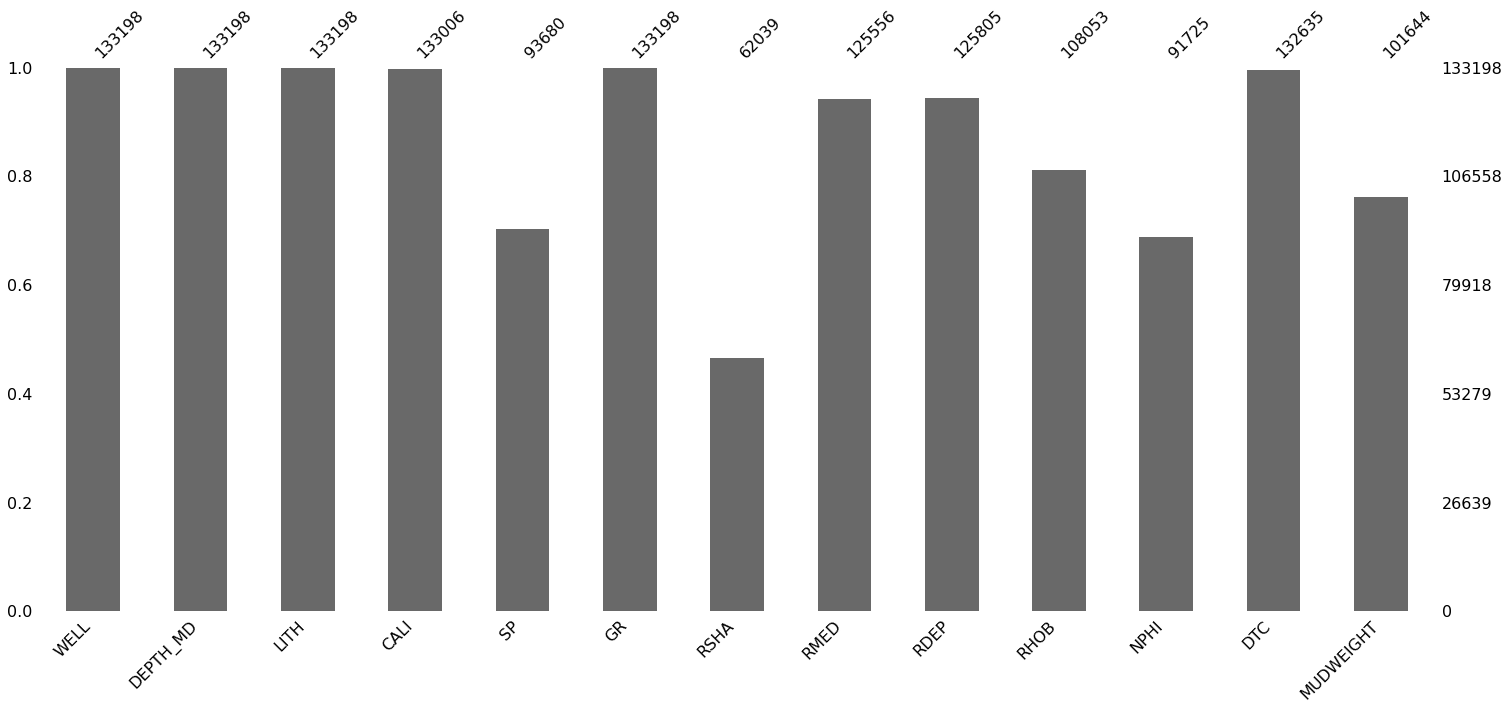

In [12]:
msno.bar(well_data)

In [13]:
#check data info
well_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   WELL       133198 non-null  object 
 1   DEPTH_MD   133198 non-null  float64
 2   LITH       133198 non-null  object 
 3   CALI       133006 non-null  float64
 4   SP         93680 non-null   float64
 5   GR         133198 non-null  float64
 6   RSHA       62039 non-null   float64
 7   RMED       125556 non-null  float64
 8   RDEP       125805 non-null  float64
 9   RHOB       108053 non-null  float64
 10  NPHI       91725 non-null   float64
 11  DTC        132635 non-null  float64
 12  MUDWEIGHT  101644 non-null  float64
dtypes: float64(11), object(2)
memory usage: 13.2+ MB


In [14]:
# check missing value 
well_data.isnull().sum()

WELL             0
DEPTH_MD         0
LITH             0
CALI           192
SP           39518
GR               0
RSHA         71159
RMED          7642
RDEP          7393
RHOB         25145
NPHI         41473
DTC            563
MUDWEIGHT    31554
dtype: int64

## From this plot we can get  some insights about states of each well :


In [15]:
data_nan = well_data[['WELL','DEPTH_MD','LITH','CALI', 'SP', 'GR','RSHA','RMED','RDEP','RHOB', 'NPHI', 'DTC','MUDWEIGHT']].copy()
for num, col in enumerate(data_nan.columns[3:]):
    data_nan[col] = data_nan[col].notnull() * (num + 1)
    data_nan[col].replace(0, num, inplace=True)
    print(col, num) #Print out the col name and number to verify it works
grouped = data_nan.groupby('WELL')

CALI 0
SP 1
GR 2
RSHA 3
RMED 4
RDEP 5
RHOB 6
NPHI 7
DTC 8
MUDWEIGHT 9


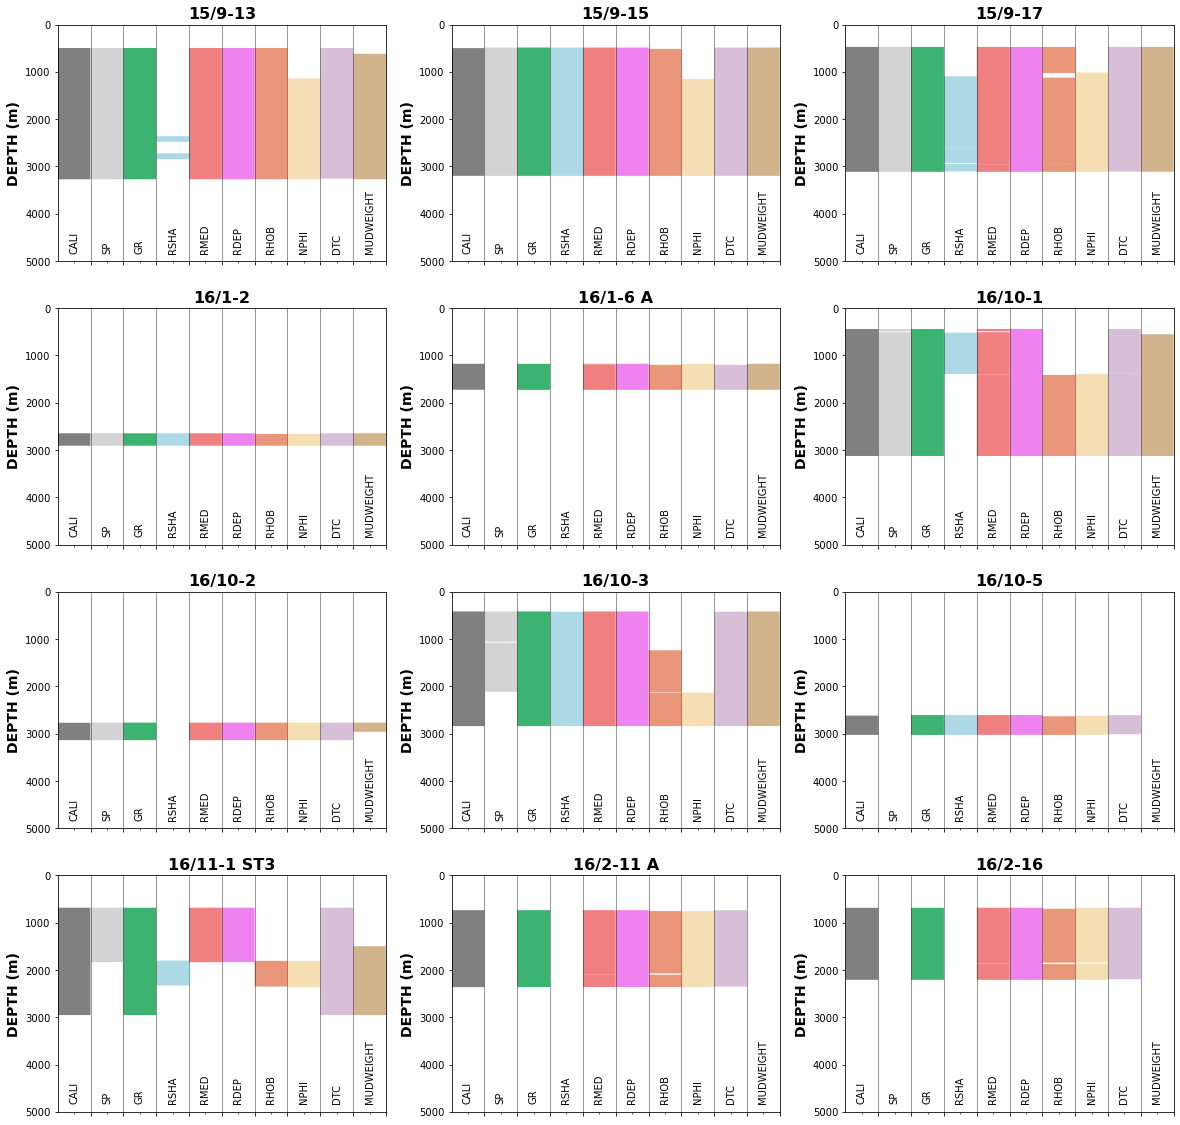

In [16]:
#Setup the labels we want to display on the x-axis
labels = ['CALI', 'SP', 'GR','RSHA','RMED','RDEP','RHOB', 'NPHI', 'DTC','MUDWEIGHT']

#Setup the figure and the subplots
fig, axs = plt.subplots(4, 3, figsize=(20,20))

#Loop through each well and column in the grouped dataframe
for (name, df), ax in zip(grouped, axs.flat):
    ax.set_xlim(0,9)
    
    #Setup the depth range
    ax.set_ylim(5000, 0)
    
    #Create multiple fill betweens for each curve# This is between
    # the number representing null values and the number representing
    # actual values
    
    ax.fill_betweenx(df.DEPTH_MD, 0, df.CALI, facecolor='grey')
    ax.fill_betweenx(df.DEPTH_MD, 1, df.SP, facecolor='lightgrey')
    ax.fill_betweenx(df.DEPTH_MD, 2, df.GR, facecolor='mediumseagreen')
    ax.fill_betweenx(df.DEPTH_MD, 3, df.RSHA, facecolor='lightblue')
    ax.fill_betweenx(df.DEPTH_MD, 4, df.RMED, facecolor='lightcoral')
    ax.fill_betweenx(df.DEPTH_MD, 5, df.RDEP, facecolor='violet')
    ax.fill_betweenx(df.DEPTH_MD, 6, df.RHOB, facecolor='darksalmon')
    ax.fill_betweenx(df.DEPTH_MD, 7, df.NPHI, facecolor='wheat')
    ax.fill_betweenx(df.DEPTH_MD, 8, df.DTC, facecolor='thistle')
    ax.fill_betweenx(df.DEPTH_MD, 9, df.MUDWEIGHT, facecolor='tan')
    
    #Setup the grid, axis labels and ticks
    ax.grid(axis='x', alpha=0.5, color='black')
    ax.set_ylabel('DEPTH (m)', fontsize=14, fontweight='bold')
    
    #Position vertical lines at the boundaries between the bars
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10], minor=False)
    
    #Position the curve names in the centre of each column
    ax.set_xticks([0.5, 1.5 ,2.5 ,3.5 ,4.5 ,5.5 ,6.5 , 7.5, 8.5, 9.5], minor=True)
    
    #Setup the x-axis tick labels
    ax.set_xticklabels(labels,  rotation='vertical', minor=True, verticalalignment='bottom')
    ax.set_xticklabels('', minor=False)
    ax.tick_params(axis='x', which='minor', pad=-10)
    
    #Assign the well name as the title to each subplot
    ax.set_title(name, fontsize=16, fontweight='bold')




## There can be several reasons for missing values or short records in well logs, including:
1.Drilling problems: If the wellbore encounters drilling problems such as a cave-in, lost circulation, or stuck drill pipe, it may not be possible to collect data for certain intervals.

2.Tool failures: Well logging tools can malfunction, causing gaps or missing data in the log. For example, a tool may fail to take measurements due to a mechanical issue or a problem with the electronics.

3.Poor formation conditions: Sometimes, the formation conditions may be too difficult for the logging tools to function properly. For example, if the wellbore is filled with caving materials or drilling fluids, it may not be possible to obtain accurate data.

4.Logging program limitations: In some cases, logging programs may be designed to skip certain intervals or to only collect data at specific depths.

5.Human error: Occasionally, missing data can be attributed to human error. For example, if the logging tool is not properly calibrated or if the operator makes an error during data collection, the resulting log may contain missing values or short records.

It is important to note that missing data or short records can affect the accuracy and reliability of well log interpretations. Therefore, it is essential to identify and understand the causes of these data gaps to properly evaluate the subsurface conditions.


# Dealing with missing data or short records in well logs can be challenging, but there are several methods that can be used to handle these cases:


1- Data interpolation: Interpolation involves estimating missing values based on the available data points. This method can be useful if the missing data occurs in relatively short intervals and the surrounding data points are consistent.

2.Data extrapolation: Extrapolation involves extending the log data beyond the measured interval to fill in gaps in the log. However, extrapolation should be used with caution as it can introduce uncertainty and potentially inaccurate data.

3.Data fusion: Data fusion involves combining information from multiple sources to fill in missing data. For example, combining well log data with seismic data can help fill in gaps in the well log data.

4.Quality control: It is important to perform quality control checks on well log data to identify and remove any data points that may be erroneous or inconsistent.

5.Re-logging: If missing data or short records are suspected to be due to tool failure or poor formation conditions, re-logging the wellbore with a different tool or at a later time may help to fill in the gaps.

In [17]:
# Interpolate the missing values using linear interpolation
df = well_data.interpolate(method='linear')

# Univariate Analysis :
1. Nummerical Analysis

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   WELL       133198 non-null  object 
 1   DEPTH_MD   133198 non-null  float64
 2   LITH       133198 non-null  object 
 3   CALI       133198 non-null  float64
 4   SP         133198 non-null  float64
 5   GR         133198 non-null  float64
 6   RSHA       120929 non-null  float64
 7   RMED       133198 non-null  float64
 8   RDEP       133198 non-null  float64
 9   RHOB       133198 non-null  float64
 10  NPHI       128960 non-null  float64
 11  DTC        133198 non-null  float64
 12  MUDWEIGHT  132392 non-null  float64
dtypes: float64(11), object(2)
memory usage: 13.2+ MB


In [19]:
#statistics 
df.describe()

,DEPTH_MD,CALI,SP,GR,RSHA,RMED,RDEP,RHOB,NPHI,DTC,MUDWEIGHT
count,133198.000000,133198.000000,133198.000000,133198.000000,120929.000000,133198.000000,133198.000000,133198.000000,128960.000000,133198.000000,132392.000000
mean,1792.944663,13.197417,80.283522,69.553872,6.257215,1.670318,1.750446,2.198515,0.354662,122.643997,2.700905
std,739.441515,3.561060,86.194872,39.328728,83.465099,9.985720,12.860974,0.227610,0.137490,34.225297,17.708854
min,415.261599,5.946157,-2.199269,0.109284,0.130193,-0.008419,0.123068,1.366913,-0.023143,7.415132,0.125818
25%,1182.822400,11.320417,45.526821,43.244637,0.773152,0.765776,0.792149,2.038931,0.256570,87.885027,0.141395
50%,1747.524495,12.697430,57.530396,66.266132,1.228093,1.076985,1.175226,2.157380,0.357948,135.886047,0.160567
75%,2413.874901,14.941667,87.158136,93.808681,2.080469,1.480313,1.741318,2.398191,0.478808,147.367481,1.162316
max,3272.024000,25.717396,526.547302,804.298950,2193.904541,1796.209106,1856.935059,3.115611,0.817310,230.432953,185.730927


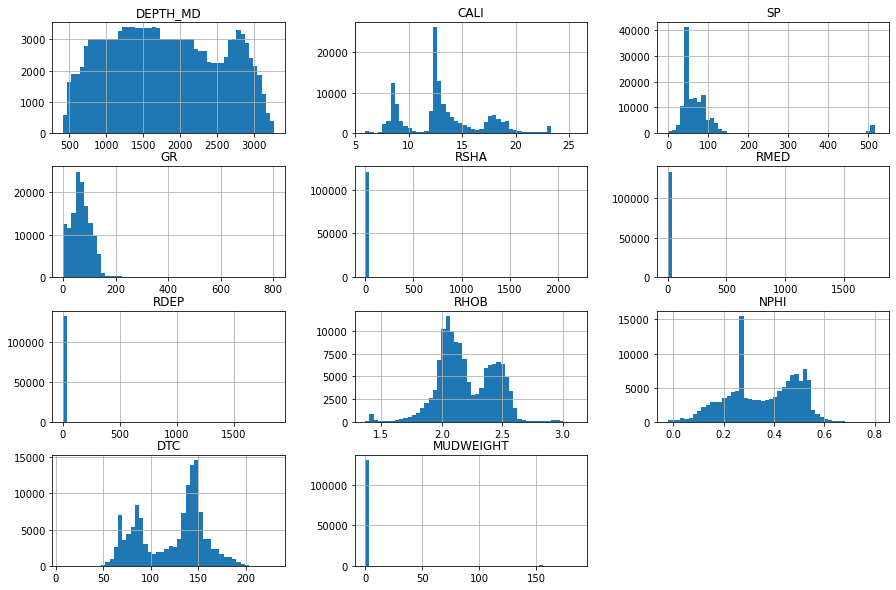

In [20]:
#data distribution
df.hist(bins=50,figsize=(15,10))
plt.show()

In [21]:
skewness = df.skew()
print("Skewness:")
print(skewness)

Skewness:
DEPTH_MD       0.093931
CALI           0.496051
SP             4.231237
GR             1.346259
RSHA          20.395404
RMED         112.569638
RDEP         107.052466
RHOB          -0.089037
NPHI          -0.223351
DTC           -0.295559
MUDWEIGHT      8.312932
dtype: float64


C:\Users\AHMED\AppData\Local\Temp\ipykernel_5444\3462701343.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = df.skew()


In [22]:
# Loop through variables and determine skewness type
for var in skewness.index:
    s = skewness.loc[var]
    if s == 0:
        print(var, 'is symmetric')
    elif s > 0:
        print(var, 'is right-skewed')
    else:
        print(var, 'is left-skewed')    

DEPTH_MD is right-skewed
CALI is right-skewed
SP is right-skewed
GR is right-skewed
RSHA is right-skewed
RMED is right-skewed
RDEP is right-skewed
RHOB is left-skewed
NPHI is left-skewed
DTC is left-skewed
MUDWEIGHT is right-skewed


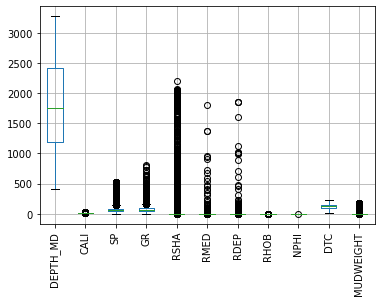

In [23]:
# create a boxplot of all columns to check outliers
df.boxplot()
plt.xticks(rotation=90)
# display the plot
plt.show()

In [24]:
# select categorical columns
dfs = df.select_dtypes(include='float')
dfs

,DEPTH_MD,CALI,SP,GR,RSHA,RMED,RDEP,RHOB,NPHI,DTC,MUDWEIGHT
0,494.528000,19.480835,24.612379,80.200851,NaN,1.611410,1.798681,1.884186,NaN,161.131180,NaN
1,494.680000,19.468800,23.895531,79.262886,NaN,1.618070,1.795641,1.889794,NaN,160.603470,NaN
2,494.832000,19.468800,23.916357,74.821999,NaN,1.626459,1.800733,1.896523,NaN,160.173615,NaN
3,494.984000,19.459282,23.793688,72.878922,NaN,1.621594,1.801517,1.891913,NaN,160.149429,NaN
4,495.136000,19.453100,24.104078,71.729141,NaN,1.602679,1.795299,1.880034,NaN,160.128342,NaN
...,...,...,...,...,...,...,...,...,...,...,...
133193,2207.310396,8.698007,45.526821,127.456139,2.080469,5.382444,5.339929,2.531374,0.12344,70.007980,1.378004
133194,2207.462396,8.721210,45.526821,128.403305,2.080469,5.651109,5.689734,2.526128,0.12344,70.007980,1.378004
133195,2207.614396,8.739136,45.526821,127.829262,2.080469,5.870602,5.496074,2.528934,0.12344,70.007980,1.378004
133196,2207.766396,8.749738,45.526821,126.552277,2.080469,5.756996,5.345353,2.527052,0.12344,70.007980,1.378004


In [25]:
# Loop through variables and determine outliers
for col in dfs.columns:
    q1, q3 = np.percentile(dfs[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = dfs[(dfs[col] < lower_bound) | (dfs[col] > upper_bound)][col]
    print(f"{col}: {len(outliers)} outliers")
   

DEPTH_MD: 0 outliers
CALI: 3529 outliers
SP: 5163 outliers
GR: 1406 outliers
RSHA: 0 outliers
RMED: 13510 outliers
RDEP: 8714 outliers
RHOB: 1189 outliers
NPHI: 0 outliers
DTC: 0 outliers
MUDWEIGHT: 0 outliers


In [26]:
#we can handle  outliers and skeweness with Logarithmic transformation ()
new_data = np.log(dfs)


In [27]:
#add categorical data manipulating nummerical data
# add the WELL and LITH columns from the df DataFrame to new_data
new_data.insert(loc=0, column='WELL', value=df['WELL'])
new_data.insert(loc=1, column='LITH', value=df['LITH'])

In [28]:
new_data

,WELL,LITH,DEPTH_MD,CALI,SP,GR,RSHA,RMED,RDEP,RHOB,NPHI,DTC,MUDWEIGHT
0,15/9-13,Shale,6.203604,2.969431,3.203250,4.384534,NaN,0.477109,0.587054,0.633496,NaN,5.082219,NaN
1,15/9-13,Shale,6.203911,2.968813,3.173691,4.372770,NaN,0.481234,0.585362,0.636468,NaN,5.078938,NaN
2,15/9-13,Shale,6.204218,2.968813,3.174563,4.315112,NaN,0.486405,0.588194,0.640022,NaN,5.076258,NaN
3,15/9-13,Shale,6.204525,2.968324,3.169420,4.288799,NaN,0.483410,0.588629,0.637588,NaN,5.076107,NaN
4,15/9-13,Shale,6.204832,2.968006,3.182381,4.272897,NaN,0.471677,0.585172,0.631290,NaN,5.075976,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133193,16/2-16,Sandstone,7.699530,2.163094,3.818302,4.847772,0.732593,1.683143,1.675212,0.928762,-2.091997,4.248609,0.320636
133194,16/2-16,Sandstone,7.699599,2.165758,3.818302,4.855176,0.732593,1.731852,1.738663,0.926688,-2.091997,4.248609,0.320636
133195,16/2-16,Sandstone,7.699668,2.167811,3.818302,4.850695,0.732593,1.769957,1.704034,0.927798,-2.091997,4.248609,0.320636
133196,16/2-16,Sandstone,7.699737,2.169024,3.818302,4.840655,0.732593,1.750416,1.676228,0.927053,-2.091997,4.248609,0.320636


# Univariate Analysis :- 
>2.Categorical 

# How many well logs in the file ?

In [29]:
#number of wells
num_well = well_data['WELL'].nunique()
print(f'Number of well logs = {num_well} well')

Number of well logs = 12 well


In [30]:
#well names 
well_data['WELL'].unique()

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16'], dtype=object)

In [31]:
# using value_counts() method is to count the number of occurrences of each well ,
# and to quickly get a sense of the distribution of values in that column.

well_data['WELL'].value_counts()

15/9-13        18270
15/9-15        17717
16/10-1        17675
15/9-17        17350
16/10-3        15956
16/11-1 ST3    14938
16/2-11 A      10708
16/2-16        10025
16/1-6 A        3623
16/10-5         2765
16/10-2         2437
16/1-2          1734
Name: WELL, dtype: int64

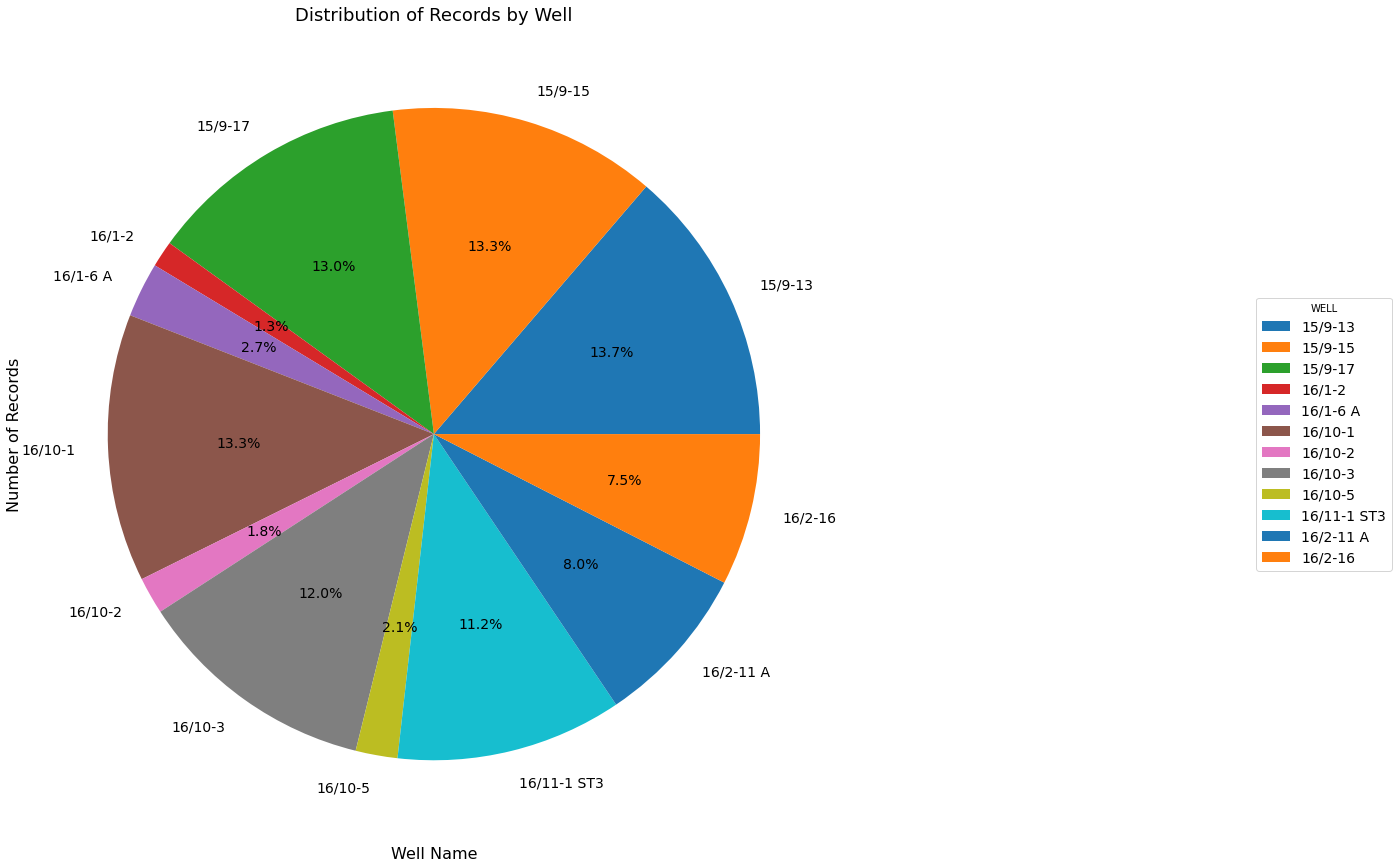

In [32]:
# Group the data by well and count the number of records for each well
well_counts = well_data.groupby('WELL')['WELL'].count()

# Create a pie chart of the well counts
plt.figure(figsize=(15, 15))
plt.pie(well_counts.values, labels=well_counts.index, autopct='%1.1f%%', textprops={'fontsize': 14})

# Add labels and title to the plot
plt.xlabel('Well Name', fontsize=16)
plt.ylabel('Number of Records', fontsize=16)
plt.title('Distribution of Records by Well', fontsize=18)

# Add legend to the plot
plt.legend(title='WELL', loc='center left', bbox_to_anchor=(1.5, 0.5), fontsize=14)

# Display the plot
plt.show()


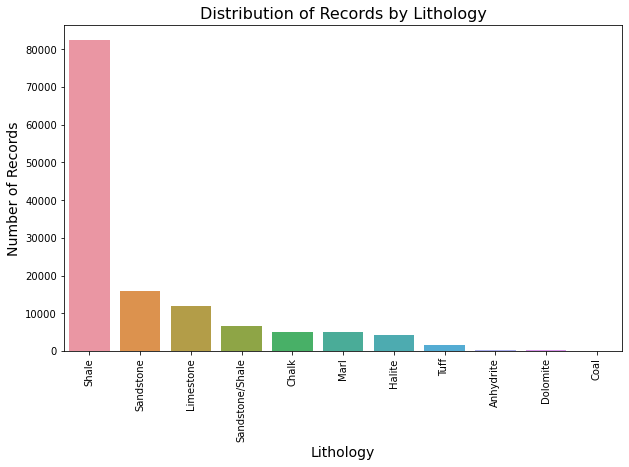

In [33]:
# Group the data by lithology and count the number of records for each lithology
lith_counts = df.groupby('LITH')['LITH'].count().sort_values(ascending=False)

# Create a bar plot of the lithology counts
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=lith_counts.index, y=lith_counts.values, ax=ax, order=lith_counts.index)

# Add labels and title to the plot
ax.set_xlabel('Lithology', fontsize=14)
ax.set_ylabel('Number of Records', fontsize=14)
ax.set_title('Distribution of Records by Lithology', fontsize=16)
ax.tick_params(axis='x', labelrotation=90)

# Display the plot
plt.show()

# What is the lithology distribution across the wells?


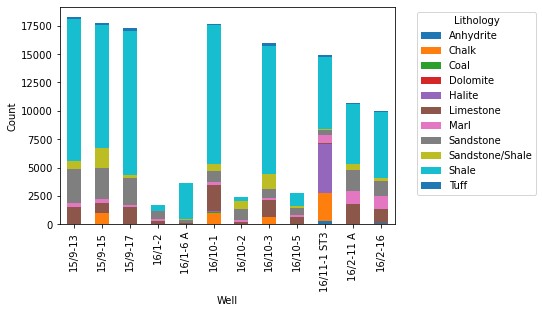

In [34]:
# Create a contingency table using crosstab()
contingency_table = pd.crosstab(df['WELL'], df['LITH'])

# Create a stacked bar chart
contingency_table.plot(kind='bar', stacked=True)

# Set the x and y-axis labels
plt.xlabel('Well')
plt.ylabel('Count')

# Add a legend
plt.legend(title='Lithology', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

# Bivariate Analysis & Multivariate analysis :-

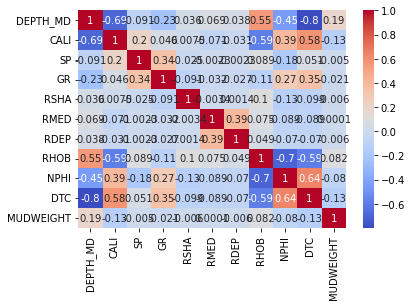

In [35]:
#Find Correlation between variables
corr_matrix = df.corr()
# Create the heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

#  Plot well logs for every well-log  :-


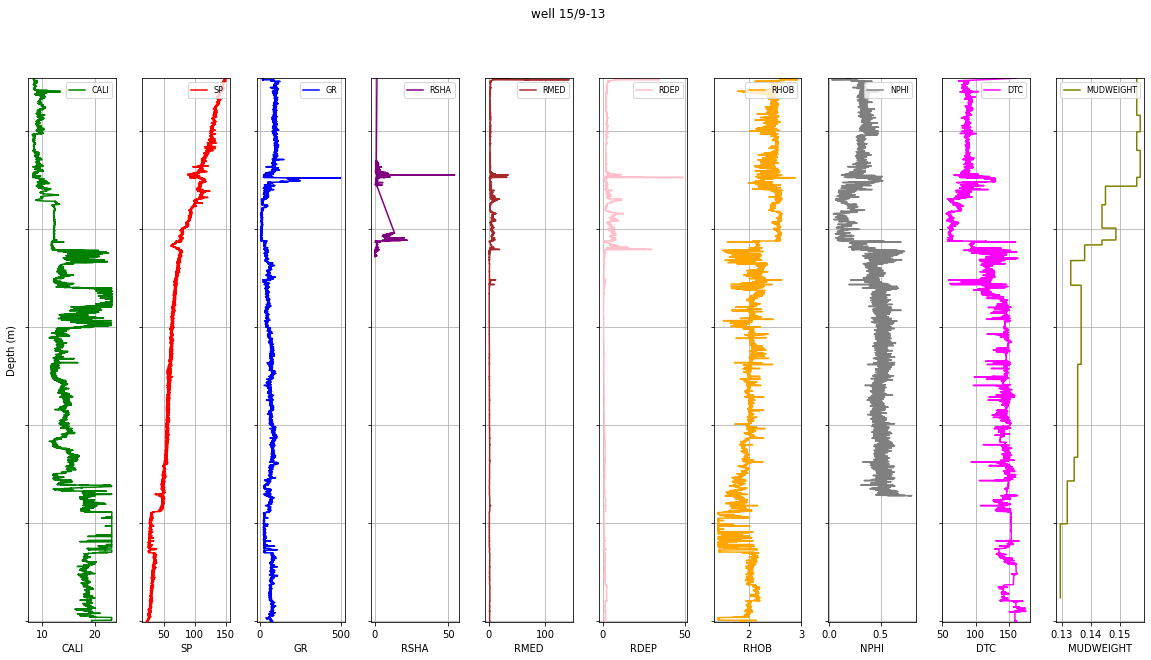

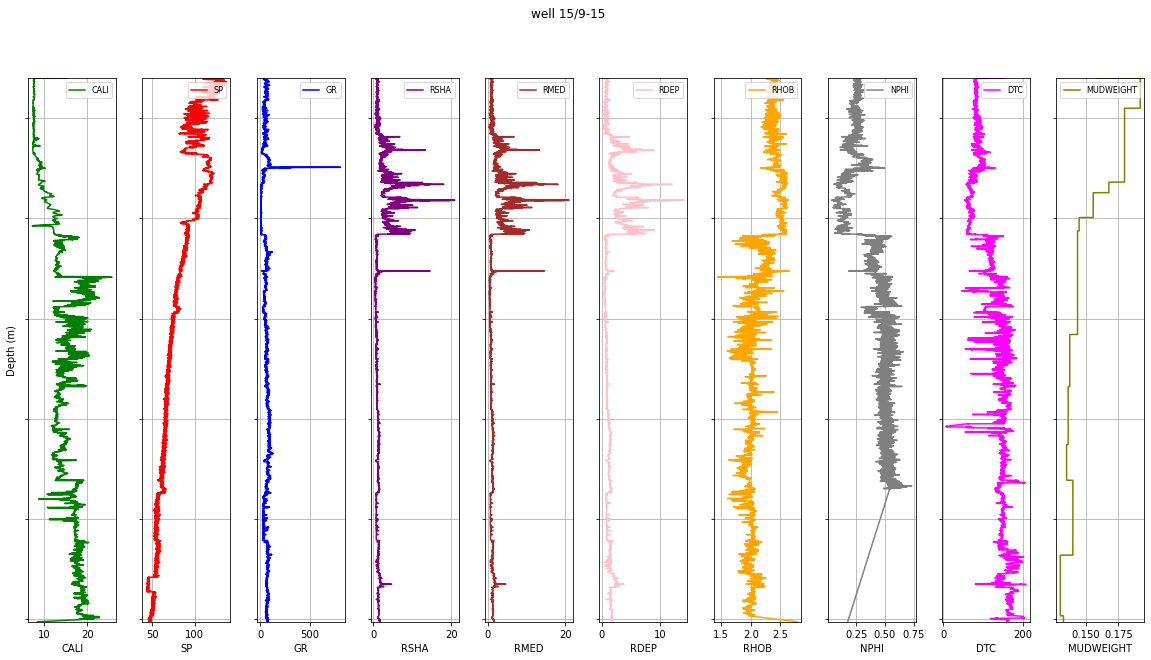

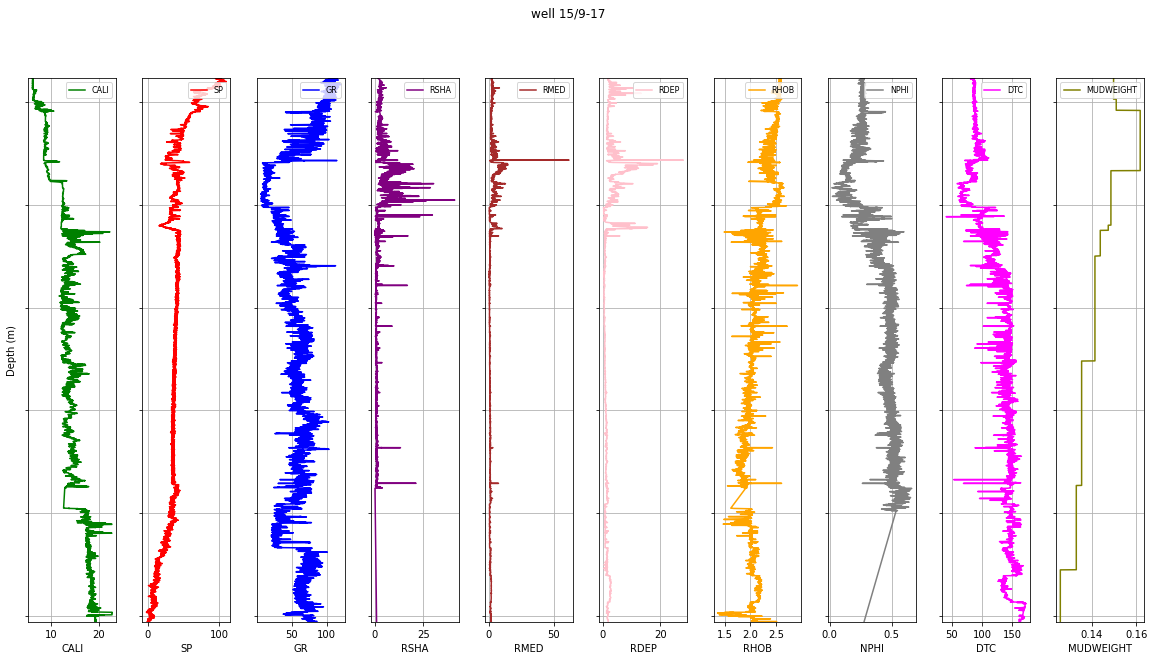

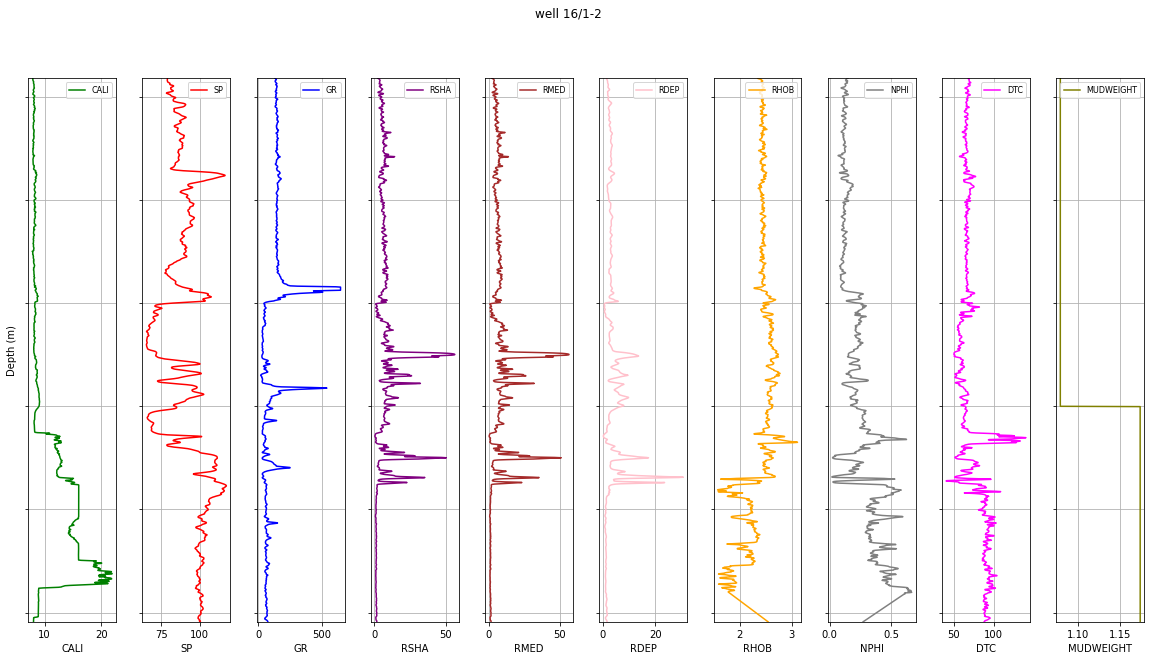

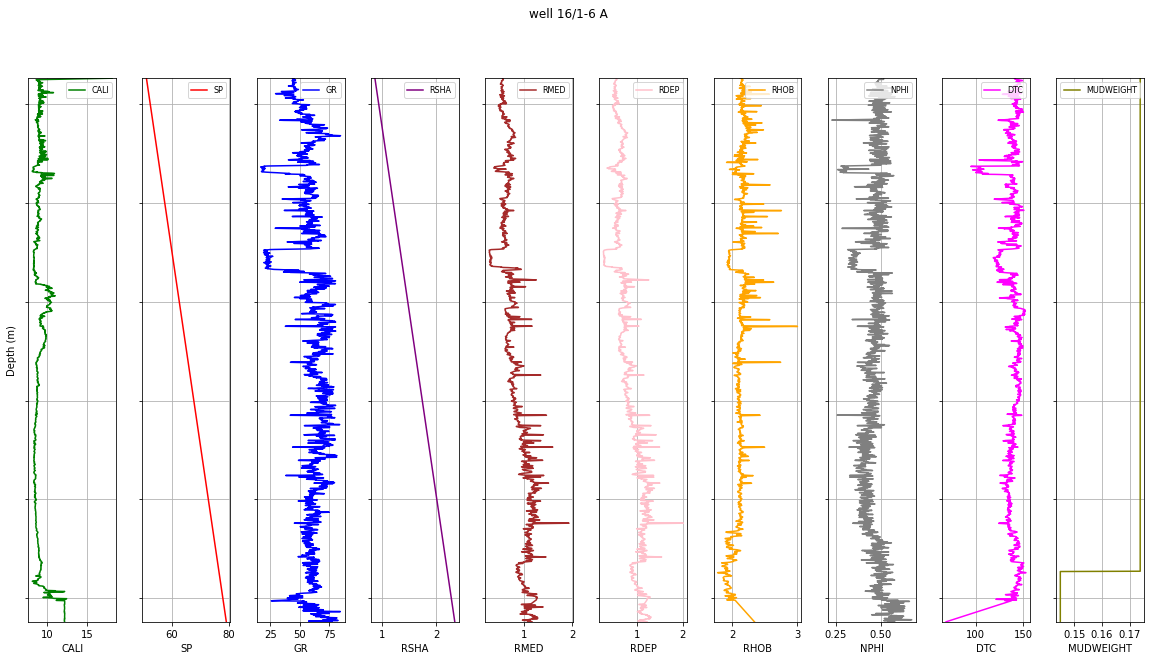

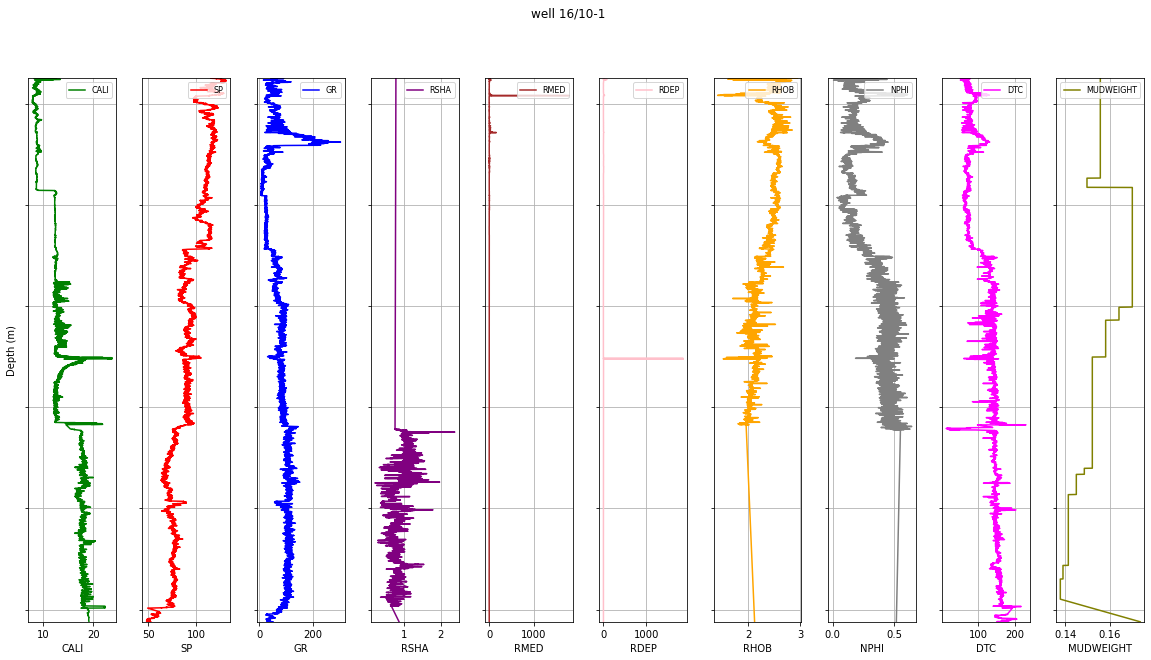

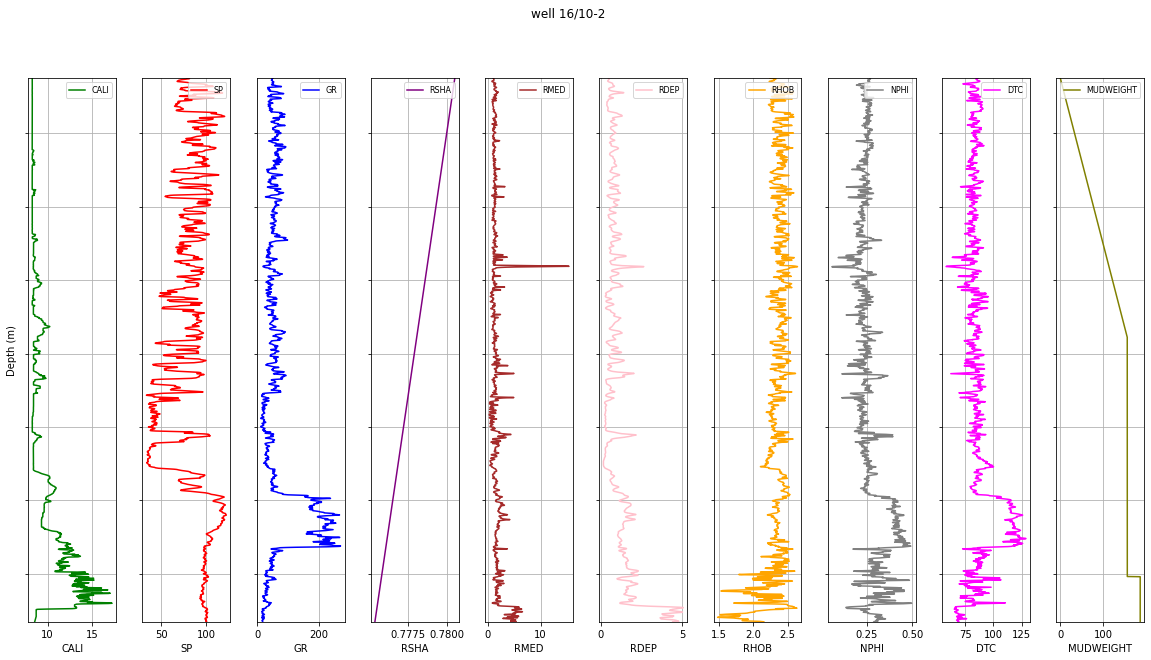

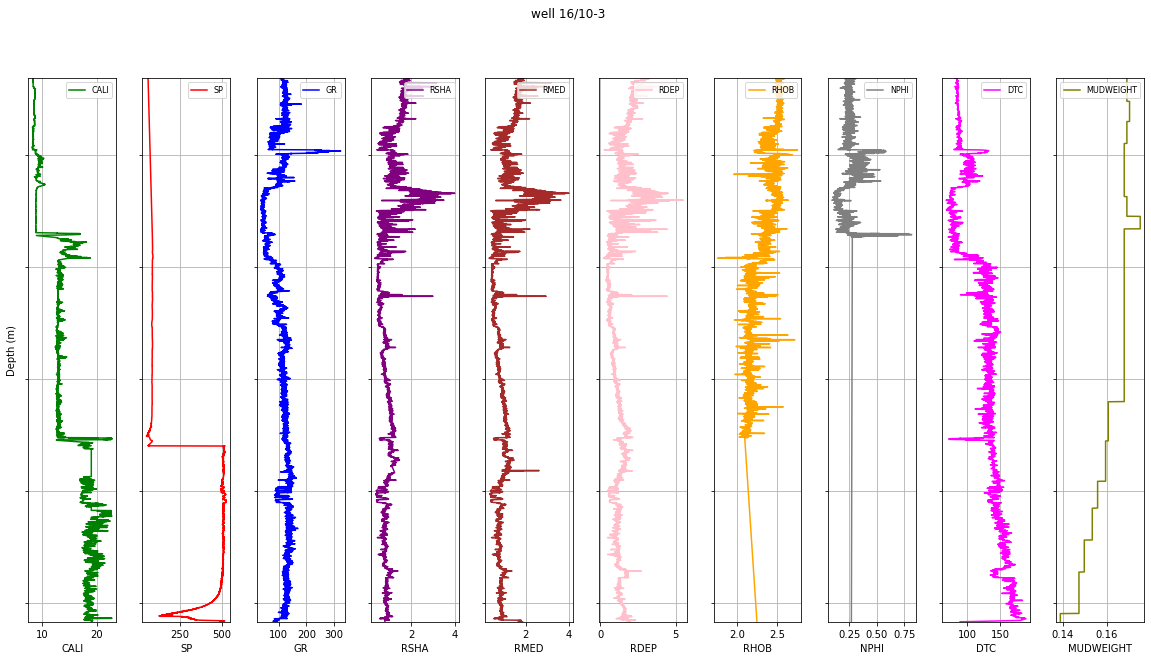

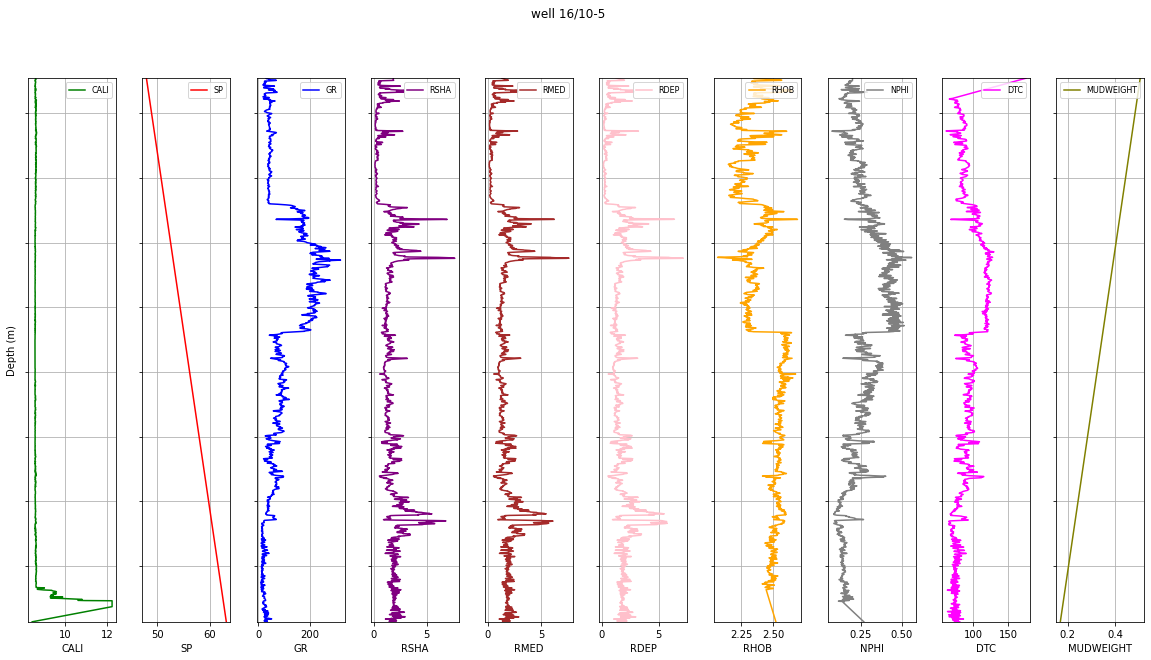

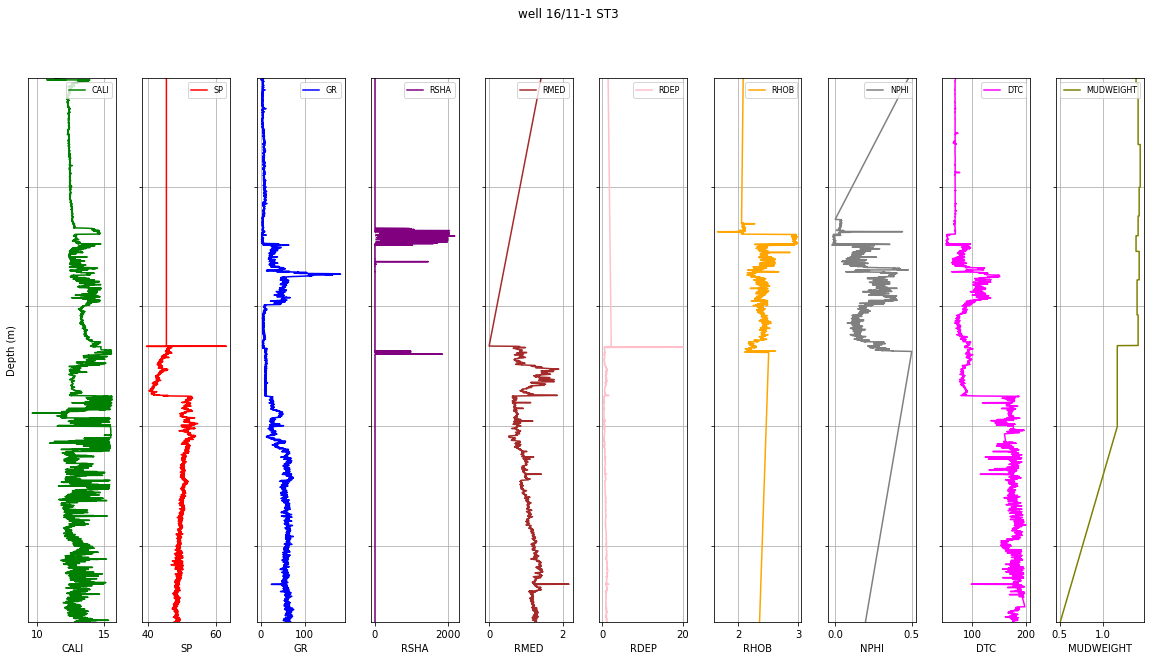

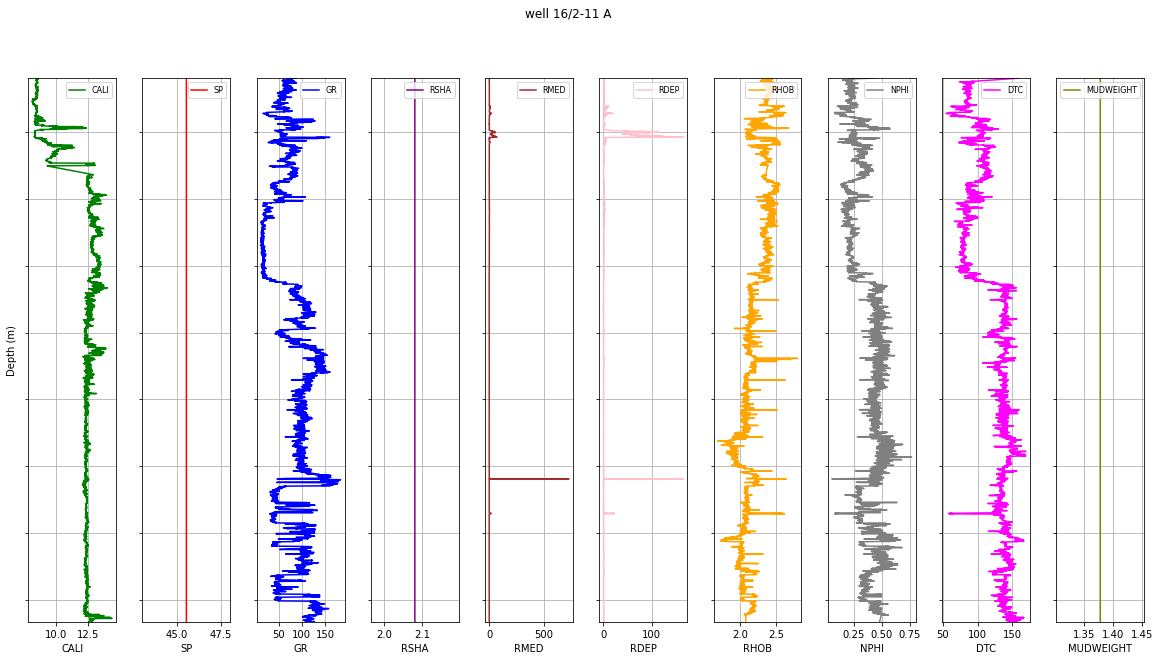

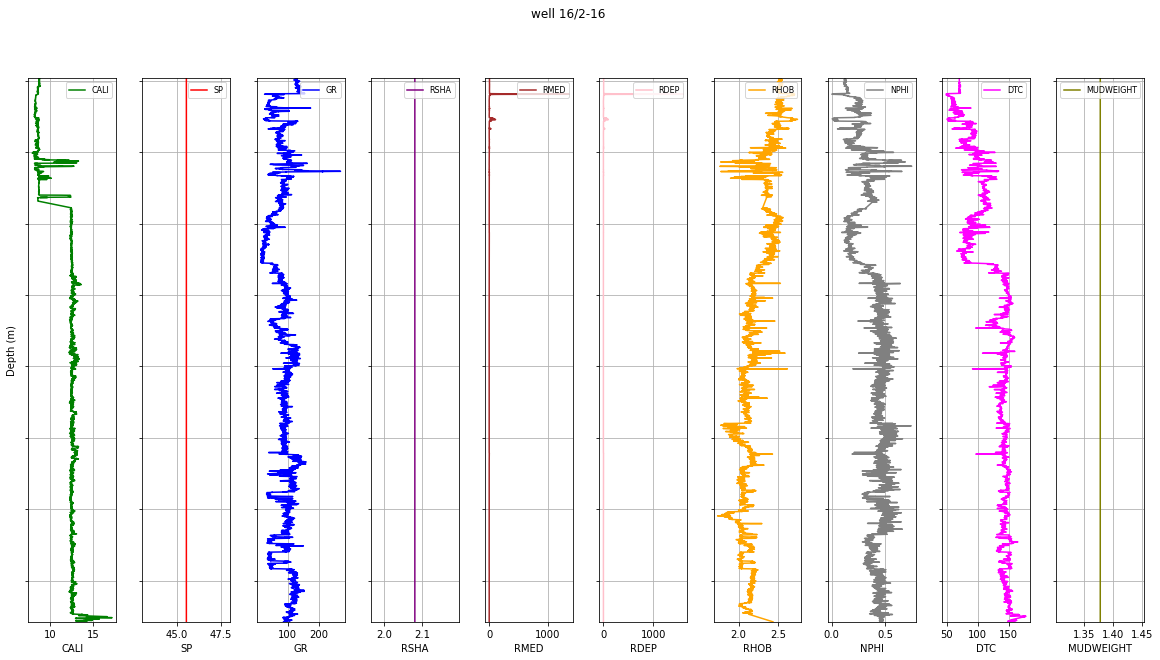

In [48]:
# Get the unique well names
well_names = df['WELL'].unique()

# Define the color palette for each log
colors = {'CALI': 'green',
          'SP': 'red',
          'GR': 'blue',
          'RSHA': 'purple',
          'RMED': 'brown',
          'RDEP': 'pink',
          'RHOB': 'orange',
          'NPHI': 'gray',
          'DTC': 'magenta',
          'MUDWEIGHT': 'olive'}

# Loop through each well
for well in well_names:
    # Select the data for the current well
    well_data = df[df['WELL'] == well]
    depth = well_data['DEPTH_MD']

    # Create a figure with subplots for each log
    fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 10))

    # Plot each log on a separate subplot
    for i, log in enumerate(['CALI', 'SP', 'GR', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'NPHI', 'DTC', 'MUDWEIGHT']):
        axes[i].plot(well_data[log], depth, color=colors[log], label=log)
        axes[i].set_xlabel(log)
        axes[i].grid(True)
        if i == 0:
            axes[i].set_ylabel('Depth (m)')
        if i == len(axes) - 1:
            axes[i].set_yticklabels([])
        else:
            axes[i].set_yticklabels([])

    # Add a legend to each plot with a scale
    for ax in axes:
        ax.legend(loc='upper right', fontsize=8)
        ax.set_ylim(max(depth), min(depth))
        ax.invert_yaxis()

    # Adjust the spacing between subplots
    fig.subplots_adjust(wspace=0.3)

    # Add the well name as a title
    fig.suptitle(f'well {well}')



    # Show the plot (optional)
    plt.show()


# Density - Neutron Distribution by Lithology and Well 

#### help in accurately identifying lithology and mineralogy in a well. This can lead to better reservoir characterization and ultimately improve hydrocarbon exploration and production.

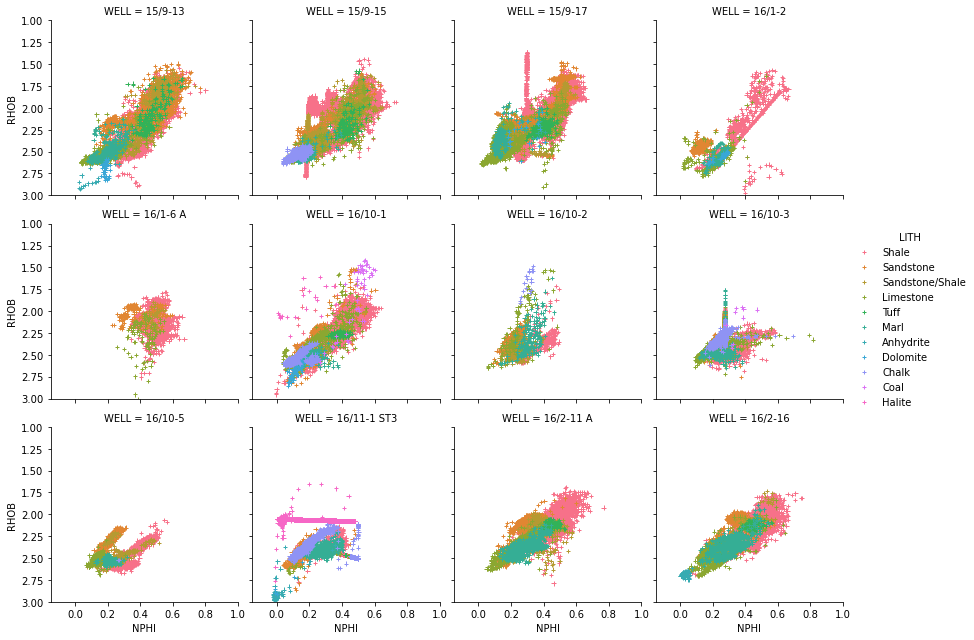

In [53]:
g = sns.FacetGrid(df, col='WELL', hue='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', linewidth=1, size=0.1, marker='+')
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))
g.add_legend()

# Identifying Bad Hole Data :

##  As identified in the missing data section only 10 of our wells have a bitsize curve. 
Therefore, 2 wells will not be plotted. We can use the bitsize curve alongside the caliper curve to create a difference caliper. Negative numbers indicate the borehole has shrunk in size (e.g. shale swelling) and positive numbers indicate the borehole has increased in size.

In [149]:
# Create an empty dictionary to store the mud thickness for each well
mud_thickness = {}

# Loop through each well
for well in data['WELL'].unique():
    # Filter data by well
    data_well = data[data['WELL'] == well]
    
    # Calculate mud thickness using equation: mud thickness = (bit size - caliper Reading) / 2
    mud_thickness[well] = (data_well['BS'] - data_well['CALI']) / 2
    
# Print mud thickness for each well
for well in well_list:
    print(f'{well}: {mud_thickness[well].mean()}')

15/9-13: nan
15/9-15: -0.667192692486665
15/9-17: nan
16/1-2: -0.8934137165339129
16/1-6 A: -0.04914902611155576
16/10-1: -0.07017235379995646
16/10-2: -0.2557351474539776
16/10-3: -0.4606087326747801
16/10-5: -0.009964842168675513
16/11-1 ST3: -0.42046306595800576
16/2-11 A: -0.15959919794667463
16/2-16: -0.13256901217133668


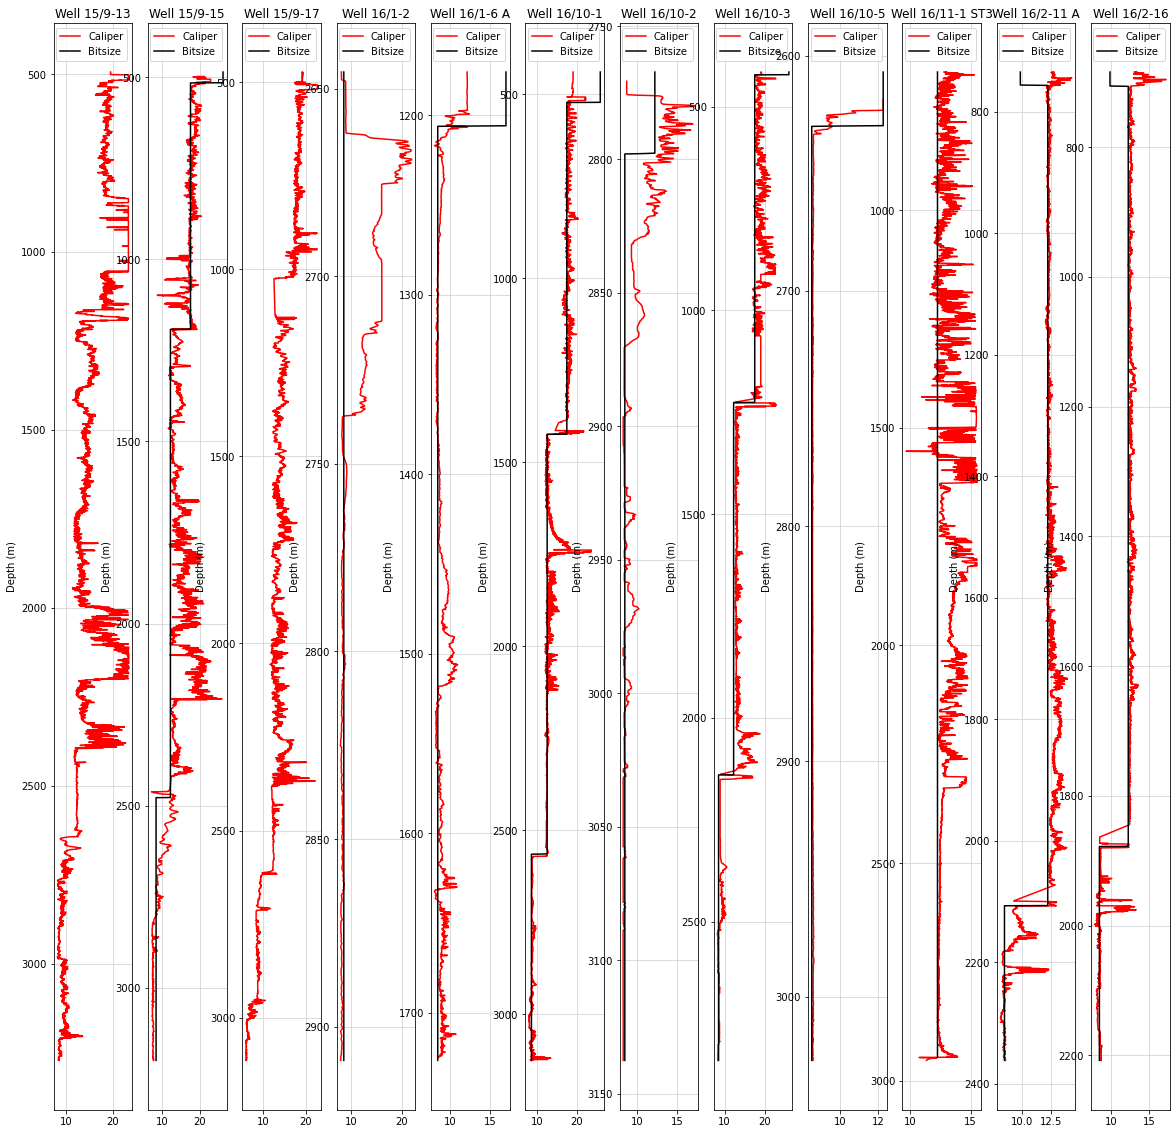

In [156]:
# Get a list of unique well names
well_list = data['WELL'].unique()

#increase space between graphs
fig.subplots_adjust(wspace=10000)

# Set up the plot
fig, axs = plt.subplots(nrows=1, ncols=len(well_list), figsize=(20, 20))

# Loop over the wells and plot the data
for i, well in enumerate(well_list):
    # Filter the data by well
    data_well = data[data['WELL'] == well]


    # Plot the data
    axs[i].plot(data_well['CALI'], data_well['DEPTH_MD'], color='red', label='Caliper')
    axs[i].plot(data_well['BS'], data_well['DEPTH_MD'], color='black', label='Bitsize')
    axs[i].set_ylabel('Depth (m)')
    axs[i].invert_yaxis()
    axs[i].set_title(f'Well {well}')
    axs[i].legend()
    axs[i].grid(which='major', color='lightgrey', linestyle='-')



# Show the plot
plt.show()


In [93]:
data['DIF_CAL'] = data['CALI'] - data['BS']

In [94]:
import math
grouped = data.groupby('WELL')
nrows = int(math.ceil(len(grouped)/3.))

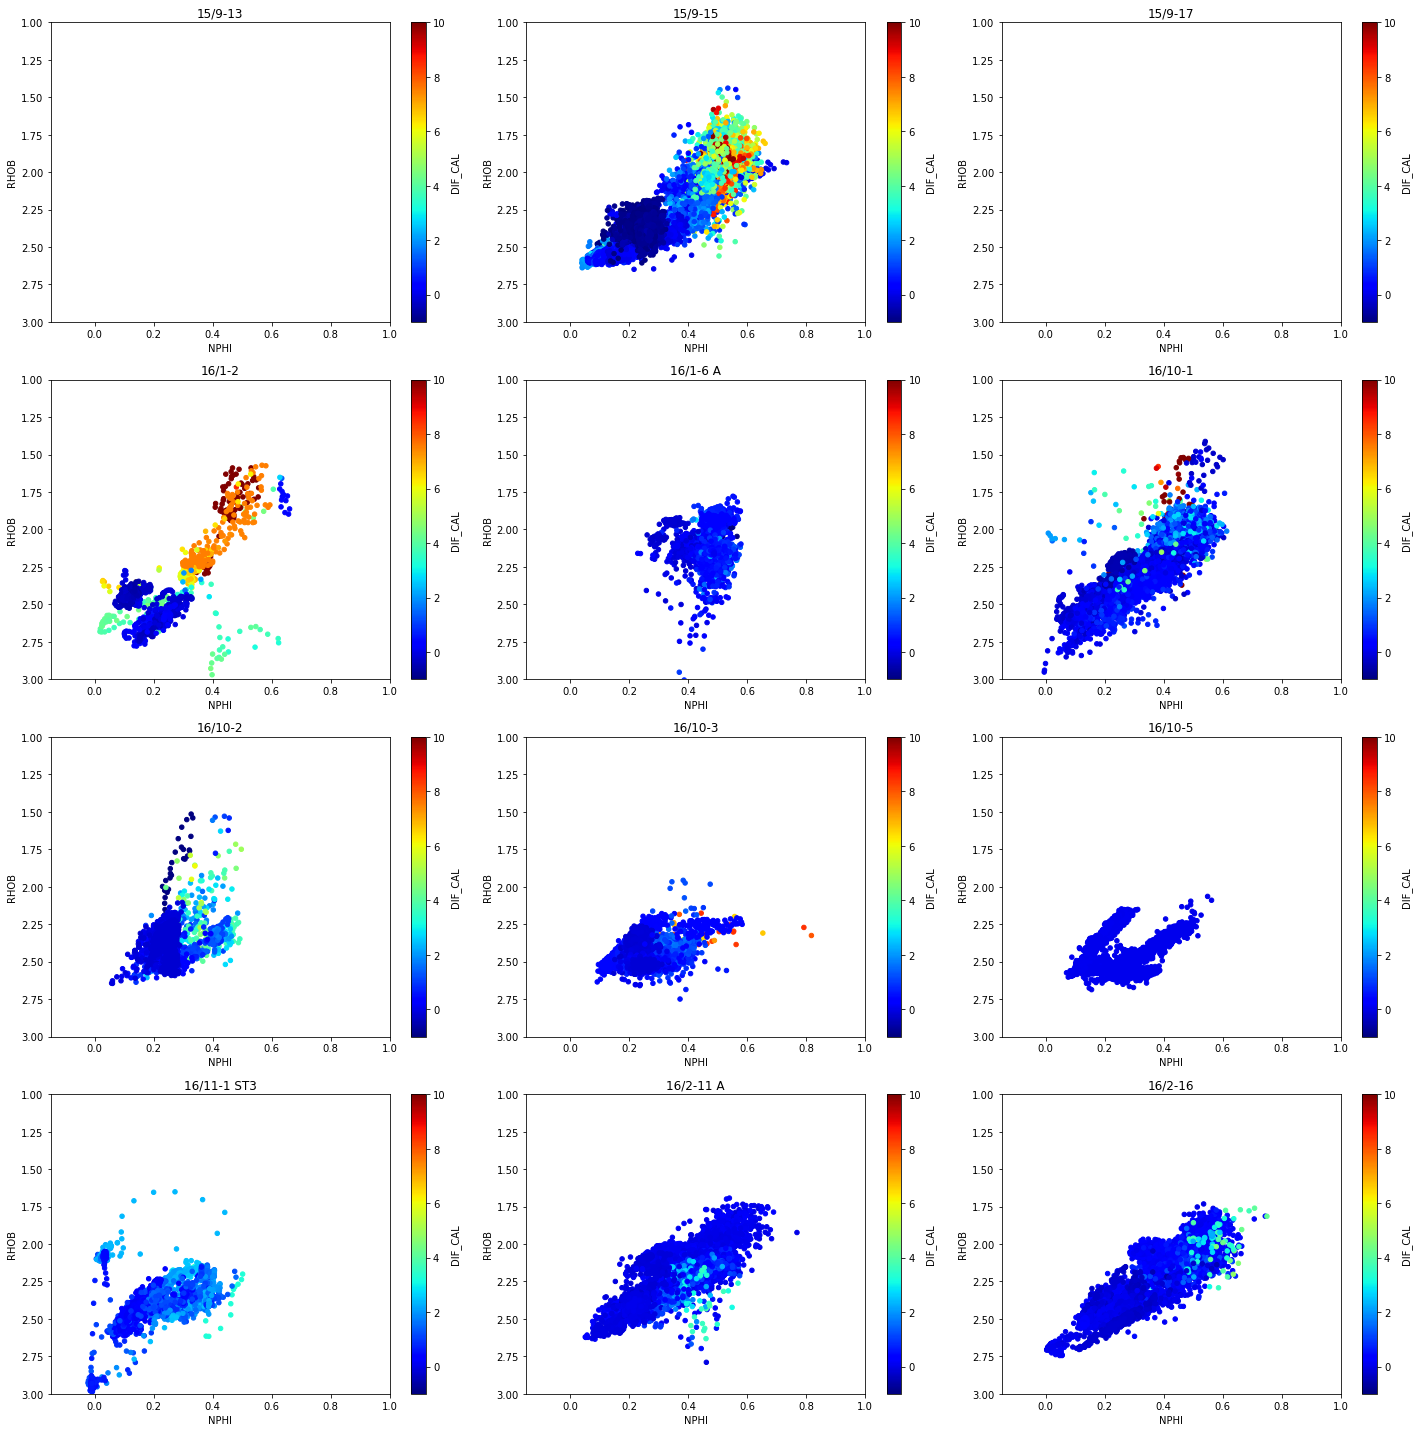

In [95]:
fig, axs = plt.subplots(nrows, 3, figsize=(20,20))
for (name, df), ax in zip(grouped, axs.flat):
    df.plot(kind='scatter', x='NPHI', y='RHOB', ax=ax, c='DIF_CAL', cmap='jet', vmin=-1, vmax=10)
    ax.set_xlim(-0.15,1)
    ax.set_ylim(3,1)
    ax.set_title(name)
plt.tight_layout()

### from this plot we can see that we may have issues with the data in two of the wells: 15/9–15 and 16/1–2. 

# We can also apply the same idea to our lithologies. If we find that a lithology is badly affected by badhole conditions

In [96]:
grouped_lith = data.groupby('LITH')

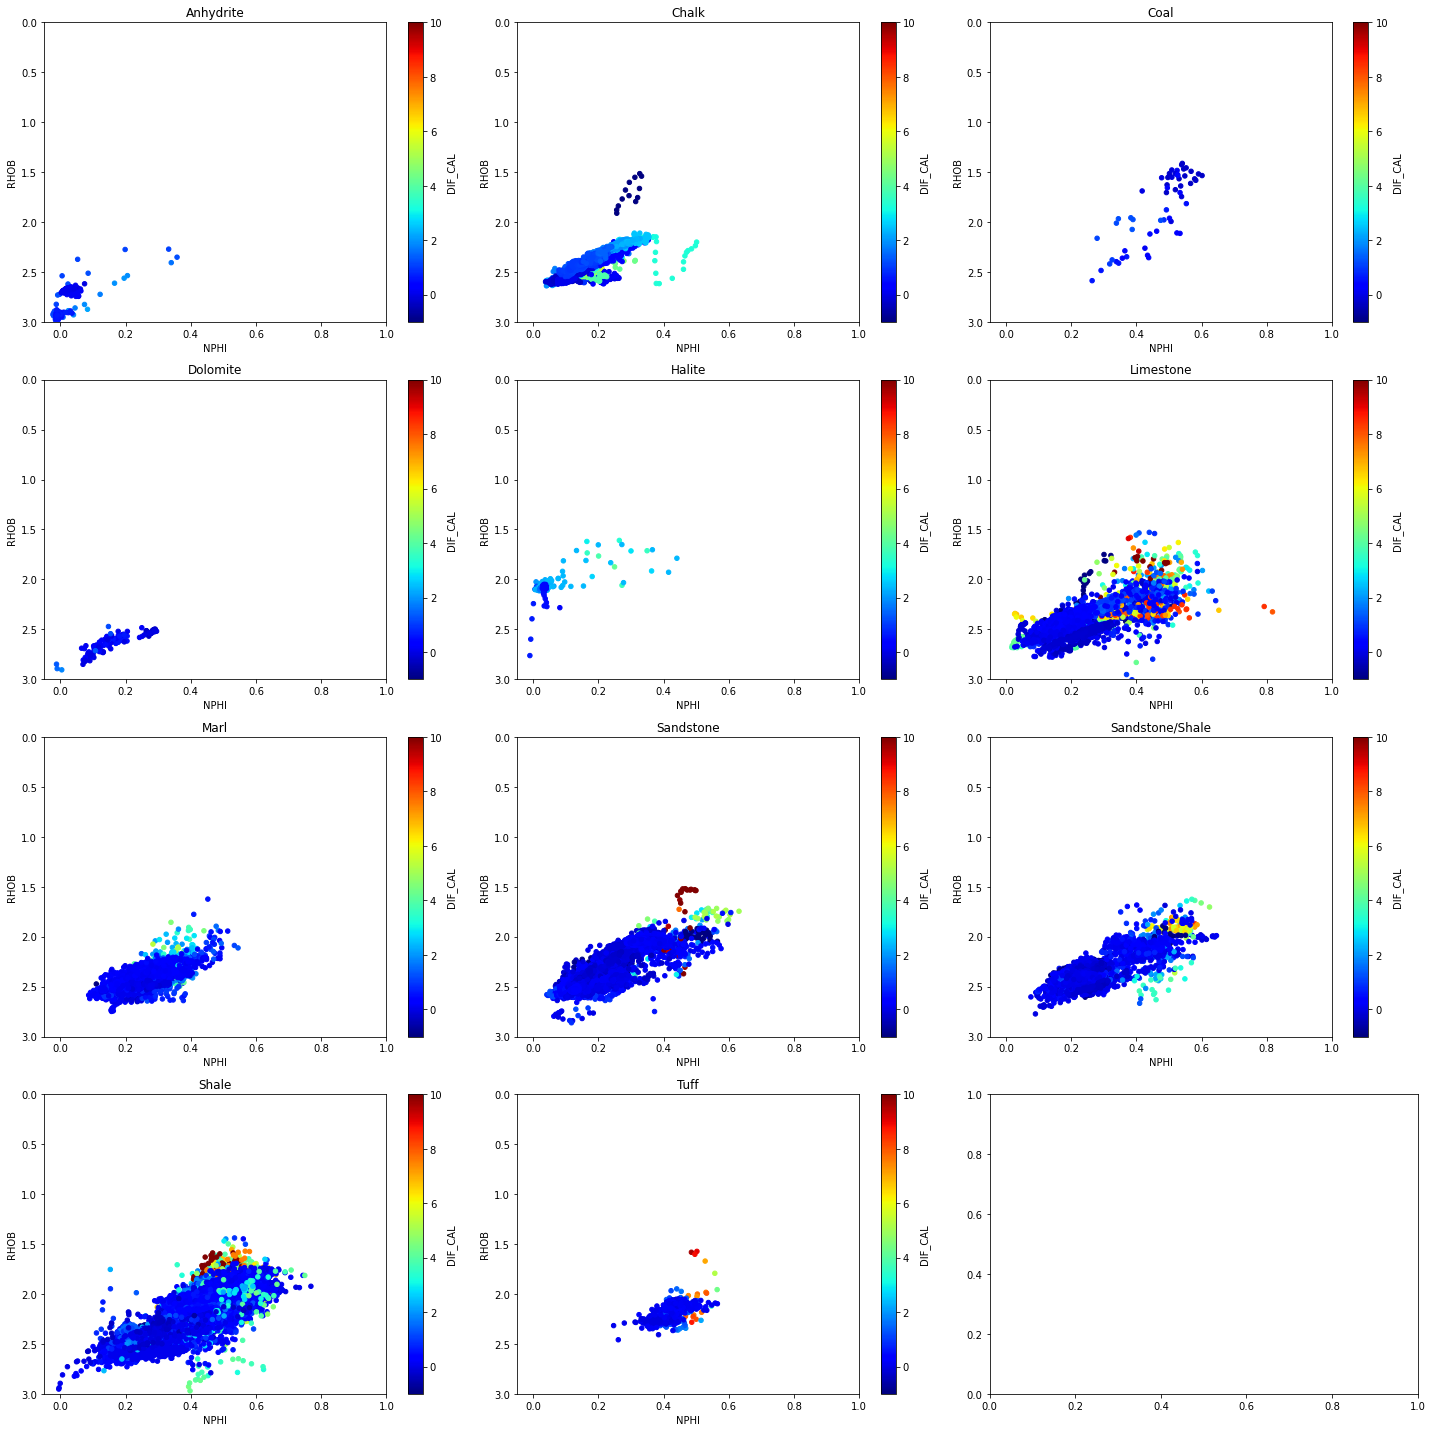

In [97]:
fig, axs = plt.subplots(nrows, 3, figsize=(20,20))
for (name, df), ax in zip(grouped_lith, axs.flat):
    df.plot(kind='scatter', x='NPHI', y='RHOB', c='DIF_CAL', cmap='jet', ax=ax, vmin=-1, vmax=10)
    ax.set_xlim(-0.05,1)
    ax.set_ylim(3,0)
    ax.set_title(name)
plt.tight_layout()

>>  From the plot, we can see that all lithologies have a large degree of 'good' data in them.
